In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time

In [ ]:
import warnings

def fxn():
    warnings.warn("deprecated", DeprecationWarning)

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    fxn()

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, cross_validate, ParameterGrid
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, HistGradientBoostingClassifier
from sklearn import tree
from sklearn.metrics import f1_score, accuracy_score, brier_score_loss
from sklearn.calibration import CalibratedClassifierCV, CalibrationDisplay

In [ ]:
# Load clinical data dataset
clinical_data_df = pd.read_csv('train_clinical_data.csv')

In [ ]:
# Load peptide dataset
peptide_df = pd.read_csv('train_peptides.csv')
peptide_df.drop(columns='visit_id')

In [ ]:
# Load protein dataset
#https://olink.com/faq/what-is-npx/
protein_df = pd.read_csv('train_proteins.csv')

In [ ]:
clinical_data_df.isna().sum()

visit_id                                  0
patient_id                                0
visit_month                               0
updrs_1                                   1
updrs_2                                   2
updrs_3                                  25
updrs_4                                1038
upd23b_clinical_state_on_medication    1327
dtype: int64

In [ ]:
clinical_data_df.isnull().sum()

visit_id                                  0
patient_id                                0
visit_month                               0
updrs_1                                   1
updrs_2                                   2
updrs_3                                  25
updrs_4                                1038
upd23b_clinical_state_on_medication    1327
dtype: int64

In [ ]:
peptide_df.isnull().sum()

visit_id            0
visit_month         0
patient_id          0
UniProt             0
Peptide             0
PeptideAbundance    0
dtype: int64

In [ ]:
protein_df.isnull().sum()

visit_id       0
visit_month    0
patient_id     0
UniProt        0
NPX            0
dtype: int64

In [ ]:
print(clinical_data_df.columns)
print(peptide_df.columns)
print(protein_df.columns)

Index(['visit_id', 'patient_id', 'visit_month', 'updrs_1', 'updrs_2',
       'updrs_3', 'updrs_4', 'upd23b_clinical_state_on_medication'],
      dtype='object')
Index(['visit_id', 'visit_month', 'patient_id', 'UniProt', 'Peptide',
       'PeptideAbundance'],
      dtype='object')
Index(['visit_id', 'visit_month', 'patient_id', 'UniProt', 'NPX'], dtype='object')


In [ ]:
for column in clinical_data_df:
    print(column, clinical_data_df[column].unique())

visit_id ['55_0' '55_3' '55_6' ... '65043_60' '65043_72' '65043_84']
patient_id [   55   942  1517  1923  2660  3636  3863  4161  4172  4923  5027  5036
  5178  5645  5742  6054  6211  6420  7051  7117  7151  7265  7508  7568
  7832  7886  8344  8699 10053 10138 10174 10541 10715 10718 11459 11686
 11928 12516 12636 12703 12755 12931 13360 13368 13618 13804 13852 13968
 14035 14124 14242 14270 14344 14450 14811 15009 15245 15504 15590 16238
 16347 16566 16574 16778 16931 17154 17201 17414 17727 18183 18204 18553
 18560 19088 20212 20216 20352 20404 20460 20581 20664 20707 20791 20792
 21126 21537 21729 22126 22623 23175 23192 23244 23391 23636 24278 24690
 24818 24820 24911 25562 25739 25750 25827 25911 26005 26104 26210 26809
 27079 27300 27464 27468 27607 27715 27872 27893 27971 27987 28327 28342
 28818 29313 29417 30119 30155 30416 30894 30951 31121 31154 31270 31693
 33108 33548 33558 34182 35231 35465 35477 35675 35696 36797 37220 37312
 37566 38419 39144 39719 40022 40200 40340 4

In [ ]:
for column in peptide_df:
    print(column, peptide_df[column].unique())

In [ ]:
for column in protein_df:
    print(column, protein_df[column].unique())

In [ ]:
clinical_X_patient = clinical_data_df.loc[ clinical_data_df['patient_id'] == 4923 ]

In [ ]:
#Filter out NaN data
filtered_clinical = clinical_data_df[~pd.isna(clinical_data_df)]

In [ ]:
#filtered_clinical = clinical_data_df.replace('NaN', np.nan, regex=True)

In [ ]:
print(clinical_X_patient.groupby('patient_id').head())

   visit_id  patient_id  visit_month  updrs_1  updrs_2  updrs_3  updrs_4  \
94   4923_0        4923            0      2.0      3.0     21.0      0.0   
95   4923_6        4923            6      6.0      3.0     23.0      0.0   
96  4923_12        4923           12      6.0      2.0     21.0      0.0   
97  4923_18        4923           18      7.0      3.0     21.0      3.0   
98  4923_24        4923           24      4.0      2.0     19.0      2.0   

   upd23b_clinical_state_on_medication  
94                                  On  
95                                  On  
96                                  On  
97                                  On  
98                                  On  


In [ ]:
clinical_data_df['visit_month'].unique()

array([  0,   3,   6,   9,  12,  18,  24,  30,  36,  42,  48,  54,  60,
        72,  84,  96, 108])

In [ ]:
clinical_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2615 entries, 0 to 2614
Data columns (total 8 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   visit_id                             2615 non-null   object 
 1   patient_id                           2615 non-null   int64  
 2   visit_month                          2615 non-null   int64  
 3   updrs_1                              2614 non-null   float64
 4   updrs_2                              2613 non-null   float64
 5   updrs_3                              2590 non-null   float64
 6   updrs_4                              1577 non-null   float64
 7   upd23b_clinical_state_on_medication  1288 non-null   object 
dtypes: float64(4), int64(2), object(2)
memory usage: 163.6+ KB


<AxesSubplot: xlabel='visit_month', ylabel='updrs_1'>

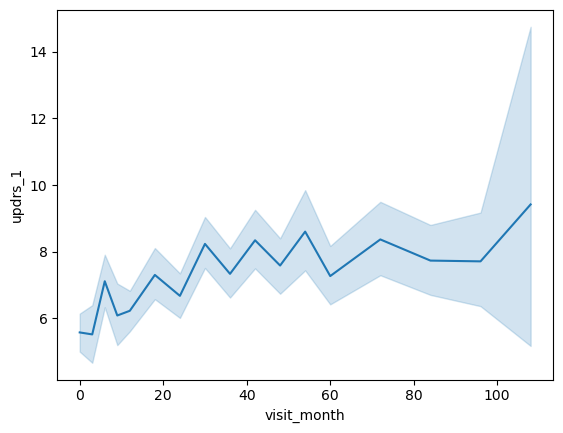

In [ ]:
#clinical_X_patient = clinical_data_df[ clinical_data_df['patient_id'] == 55 ]
cX_updrs_1 = clinical_data_df[['visit_month', 'updrs_1']]
cX_updrs_1.dropna()
#cd_updrs_1_vm = cX_updrs_1.groupby('visit_month')['updrs_1']

sns.lineplot(data=cX_updrs_1, x="visit_month", y="updrs_1")

<AxesSubplot: xlabel='visit_month', ylabel='updrs_2'>

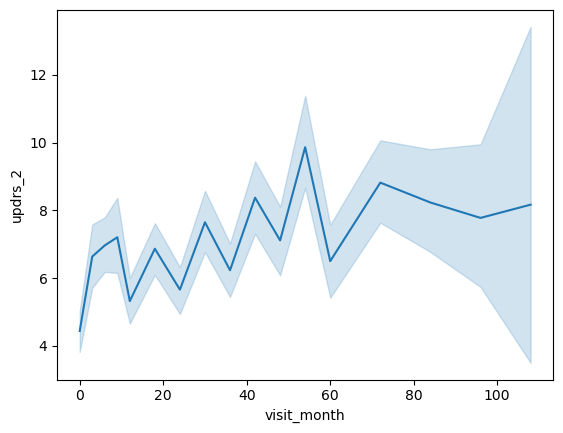

In [ ]:
#clinical_X_patient = clinical_data_df[ clinical_data_df['patient_id'] == 55 ]
cX_updrs_2 = clinical_data_df[['visit_month', 'updrs_2']]
cX_updrs_2.dropna()
#cd_updrs_1_vm = cX_updrs_1.groupby('visit_month')['updrs_1']

sns.lineplot(data=cX_updrs_2, x="visit_month", y="updrs_2")

<AxesSubplot: xlabel='visit_month', ylabel='updrs_3'>

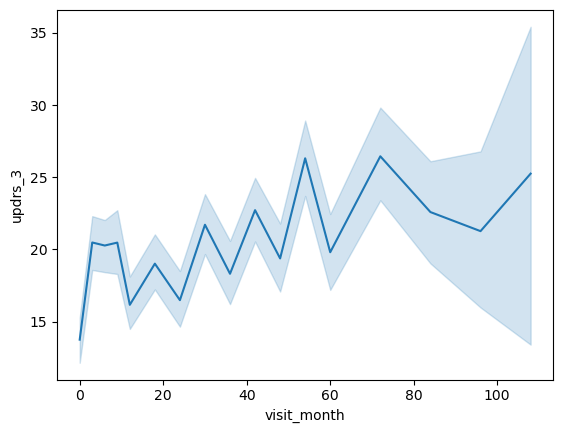

In [ ]:
#clinical_X_patient = clinical_data_df[ clinical_data_df['patient_id'] == 55 ]
cX_updrs_3 = clinical_data_df[['visit_month', 'updrs_3']]
cX_updrs_3.dropna()
#cd_updrs_1_vm = cX_updrs_1.groupby('visit_month')['updrs_1']

sns.lineplot(data=cX_updrs_3, x="visit_month", y="updrs_3")

<AxesSubplot: xlabel='visit_month', ylabel='updrs_4'>

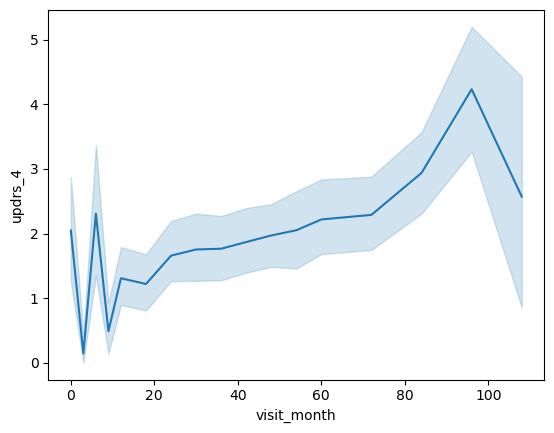

In [ ]:
#clinical_X_patient = clinical_data_df[ clinical_data_df['patient_id'] == 55 ]
cX_updrs_4 = clinical_data_df[['visit_month', 'updrs_4']]
cX_updrs_4.dropna()
#cd_updrs_1_vm = cX_updrs_1.groupby('visit_month')['updrs_1']

sns.lineplot(data=cX_updrs_4, x="visit_month", y="updrs_4")

In [ ]:
cd_updrs_1 = clinical_data_df[['visit_month', 'updrs_1']]
cd_updrs_1.dropna()
cd_updrs_1_vm = cd_updrs_1.groupby('visit_month')['updrs_1']

<AxesSubplot: xlabel='visit_month', ylabel='updrs_1'>

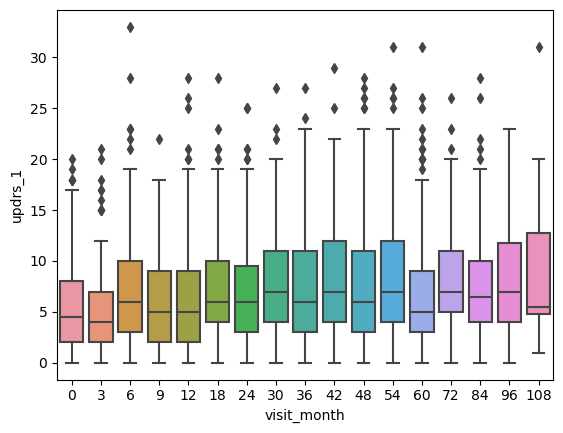

In [ ]:
# Plot it
#sns.boxplot([vals.dropna() for col, vals in cd_updrs_1_vm.iteritems()])
sns.boxplot(x=cd_updrs_1["visit_month"], y=cd_updrs_1["updrs_1"])

#Plot boxplot - log
#sns.boxplot(x=cd_updrs_1["visit_month"], y=np.log(cd_updrs_1["updrs_1"]))

<AxesSubplot: xlabel='visit_month', ylabel='updrs_2'>

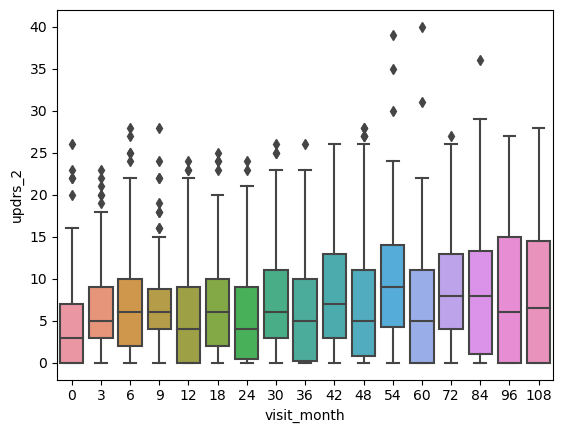

In [ ]:
cd_updrs_2 = clinical_data_df[['visit_month', 'updrs_2']]
cd_updrs_2.dropna()
cd_updrs_2_vm = cd_updrs_2.groupby('visit_month')['updrs_2']

#Plot values
sns.boxplot(data=cd_updrs_2, x="visit_month", y=cd_updrs_2["updrs_2"])

#Plot values - log
#sns.boxplot(data=cd_updrs_2, x="visit_month", y=np.log(cd_updrs_2["updrs_2"]))

<AxesSubplot: xlabel='visit_month', ylabel='updrs_3'>

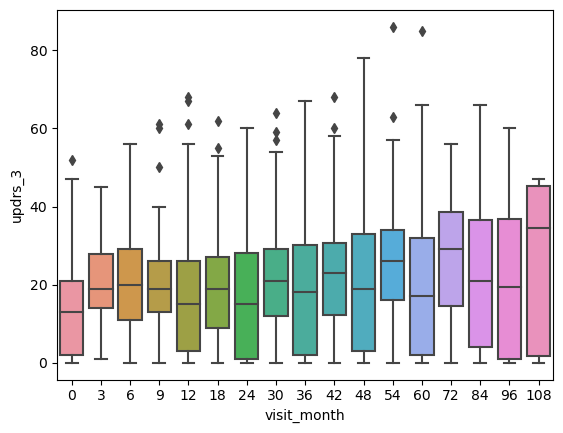

In [ ]:
cd_updrs_3 = clinical_data_df[['visit_month', 'updrs_3']]
cd_updrs_3.dropna()
cd_updrs_3_vm = cd_updrs_3.groupby('visit_month')['updrs_3']

#Plot values - log
#sns.boxplot(data=cd_updrs_3, x="visit_month", y=np.log(cd_updrs_3["updrs_3"]))

#Plot values
sns.boxplot(data=cd_updrs_3, x="visit_month", y=cd_updrs_3["updrs_3"])

<AxesSubplot: xlabel='visit_month', ylabel='updrs_4'>

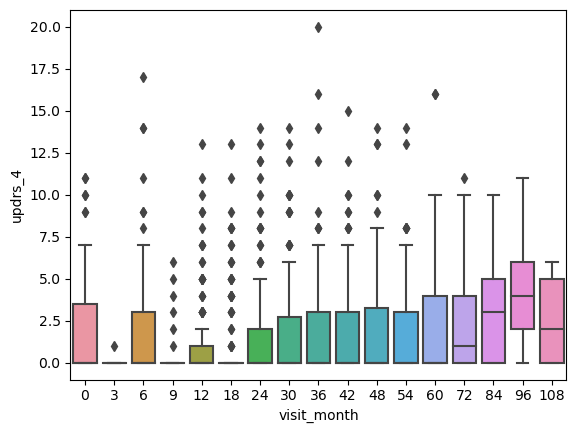

In [ ]:
cd_updrs_4 = clinical_data_df[['visit_month', 'updrs_4']]
cd_updrs_4.dropna()
cd_updrs_4_vm = cd_updrs_4.groupby('visit_month')['updrs_4']

#Plot values
sns.boxplot(data=cd_updrs_4, x="visit_month", y="updrs_4")

#Plot values - log
#sns.boxplot(data=cd_updrs_4, x="visit_month", y=np.log(cd_updrs_4["updrs_4"]))

In [ ]:
#Plot line per patient, and show change in updrs score over time (over patient visit months)